ETAPA 2: Análisis exploratorio y perfilado
* Objetivo: Explorar la evolución de los datos y realizar análisis comparativos.
* Rango temporal: 6 meses de datos (enero–junio 2020).
* Dificultad: Media – combinar múltiples archivos y realizar cálculos agregados.


In [1]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"

In [3]:
start_date = datetime(2021, 5, 1)
end_date = datetime(2021, 10, 31)
fechas = pd.date_range(start=start_date, end=end_date)

archivos = [f.strftime("%m-%d-%Y.csv") for f in fechas]

In [4]:
dframes = []
for a in archivos:
    url = base_url + a
    try:
        df = pd.read_csv(url)
        df["source_file"] = a  # Guardar origen
        dframes.append(df)
    except Exception as e:
        print(f"Error al leer {a}: {e}")

In [5]:
DFMayo_Octubre2021 = pd.concat(dframes, ignore_index=True)

In [6]:
DFMayo_Octubre2021.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,source_file
0,NaN,NaN,NaN,Afghanistan,2021-05-02 04:20:48,33.93911,67.709953,59939,2631,53272.0,4036.0,Afghanistan,153.972655,4.389463,05-01-2021.csv
1,NaN,NaN,NaN,Albania,2021-05-02 04:20:48,41.15330,20.168300,131185,2396,110172.0,18617.0,Albania,4558.516923,1.826428,05-01-2021.csv
2,NaN,NaN,NaN,Algeria,2021-05-02 04:20:48,28.03390,1.659600,122311,3261,85249.0,33801.0,Algeria,278.923810,2.666154,05-01-2021.csv
3,NaN,NaN,NaN,Andorra,2021-05-02 04:20:48,42.50630,1.521800,13232,125,12684.0,423.0,Andorra,17125.477254,0.944680,05-01-2021.csv
4,NaN,NaN,NaN,Angola,2021-05-02 04:20:48,-11.20270,17.873900,26815,600,23913.0,2302.0,Angola,81.588211,2.237554,05-01-2021.csv


In [7]:
DFMayo_Octubre2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738648 entries, 0 to 738647
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FIPS                 601016 non-null  float64
 1   Admin2               601910 non-null  object 
 2   Province_State       705712 non-null  object 
 3   Country_Region       738648 non-null  object 
 4   Last_Update          738648 non-null  object 
 5   Lat                  722042 non-null  float64
 6   Long_                722042 non-null  float64
 7   Confirmed            738648 non-null  int64  
 8   Deaths               738648 non-null  int64  
 9   Recovered            72553 non-null   float64
 10  Active               72553 non-null   float64
 11  Combined_Key         738648 non-null  object 
 12  Incident_Rate        722042 non-null  float64
 13  Case_Fatality_Ratio  730667 non-null  float64
 14  source_file          738648 non-null  object 
dtypes: float64(7), in

In [8]:
DFMayo_Octubre2021["Last_Update"] = pd.to_datetime(DFMayo_Octubre2021["Last_Update"], format='%Y-%m-%d %H:%M:%S')

In [9]:
DFMayo_Octubre2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738648 entries, 0 to 738647
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FIPS                 601016 non-null  float64       
 1   Admin2               601910 non-null  object        
 2   Province_State       705712 non-null  object        
 3   Country_Region       738648 non-null  object        
 4   Last_Update          738648 non-null  datetime64[ns]
 5   Lat                  722042 non-null  float64       
 6   Long_                722042 non-null  float64       
 7   Confirmed            738648 non-null  int64         
 8   Deaths               738648 non-null  int64         
 9   Recovered            72553 non-null   float64       
 10  Active               72553 non-null   float64       
 11  Combined_Key         738648 non-null  object        
 12  Incident_Rate        722042 non-null  float64       
 13  Case_Fatality_

In [10]:
DFMayo_Octubre2021.isnull().sum()

,0
FIPS,137632
Admin2,136738
Province_State,32936
Country_Region,0
Last_Update,0
Lat,16606
Long_,16606
Confirmed,0
Deaths,0
Recovered,666095


In [11]:
DFMayo_Octubre2021.drop(columns=["FIPS","Lat","Long_"],inplace=True)
DFMayo_Octubre2021.head()

,Admin2,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio,source_file
0,NaN,NaN,Afghanistan,2021-05-02 04:20:48,59939,2631,53272.0,4036.0,Afghanistan,153.972655,4.389463,05-01-2021.csv
1,NaN,NaN,Albania,2021-05-02 04:20:48,131185,2396,110172.0,18617.0,Albania,4558.516923,1.826428,05-01-2021.csv
2,NaN,NaN,Algeria,2021-05-02 04:20:48,122311,3261,85249.0,33801.0,Algeria,278.923810,2.666154,05-01-2021.csv
3,NaN,NaN,Andorra,2021-05-02 04:20:48,13232,125,12684.0,423.0,Andorra,17125.477254,0.944680,05-01-2021.csv
4,NaN,NaN,Angola,2021-05-02 04:20:48,26815,600,23913.0,2302.0,Angola,81.588211,2.237554,05-01-2021.csv


In [12]:
DFMayo_Octubre2021.columns = DFMayo_Octubre2021.columns.str.lower().str.replace(" ", "_").str.replace("-", "_")

In [13]:
DFMayo_Octubre2021.columns

Index(['admin2', 'province_state', 'country_region', 'last_update',
       'confirmed', 'deaths', 'recovered', 'active', 'combined_key',
       'incident_rate', 'case_fatality_ratio', 'source_file'],
      dtype='object')

In [14]:
DFMayo_Octubre2021.loc[DFMayo_Octubre2021["country_region"] == "US", "country_region"] = "United States"

In [15]:
DFMayo_Octubre2021["last_update"] = DFMayo_Octubre2021["last_update"].dt.date
DFMayo_Octubre2021["last_update"].head()

,last_update
0,2021-05-02
1,2021-05-02
2,2021-05-02
3,2021-05-02
4,2021-05-02


In [16]:
DFMayo_Octubre2021["active_cases"] = DFMayo_Octubre2021["confirmed"] - DFMayo_Octubre2021["deaths"] - DFMayo_Octubre2021["recovered"]

1. ¿Cuáles son los 10 países con más casos confirmados acumulados durante el semestre?

In [17]:
top10_confirmados = (DFMayo_Octubre2021.groupby("country_region")["confirmed"].sum().sort_values(ascending=False))
top10_confirmados.head(10)

#plt.figure(figsize=(10,6))
#sns.barplot(x=top10_confirmados.values,
#            y=top10_confirmados.index,
#            palette="Reds_r")
#plt.title("Top 10 países con más casos confirmados (Mayo-Octubre 2021)")
#plt.xlabel("Casos confirmados")
#plt.ylabel("País")
#plt.show()

,confirmed
country_region,
United States,6888830856
India,5666939219
Brazil,3548403901
France,1173736177
Russia,1147544771
United Kingdom,1123121733
Turkey,1117706272
Argentina,853177265
Italy,811471955


2. ¿Qué países presentan mayor tasa de letalidad (Deaths / Confirmed * 100)?

In [18]:
DFMayo_Octubre2021["tasa_letalidad"] = np.where(DFMayo_Octubre2021["confirmed"] > 0, (DFMayo_Octubre2021["deaths"] / DFMayo_Octubre2021["confirmed"]) * 100, np.nan)
tasa_letalidad = (DFMayo_Octubre2021.groupby("country_region")["tasa_letalidad"].mean().sort_values(ascending=False))
tasa_letalidad.head(10)

#sns.barplot(x=tasa_letalidad.values,
#            y=tasa_letalidad.index,
#            palette="coolwarm")
#plt.title("Países con mayor tasa de letalidad (Promedio mayo-octubre 2021)")
#plt.xlabel("Tasa de letalidad (%)")
#plt.ylabel("País")
#plt.show()

,tasa_letalidad
country_region,
Vanuatu,24.773551
MS Zaandam,22.222222
Yemen,19.313898
Mexico,9.597985
Belgium,9.517121
Peru,8.555551
Sudan,7.463922
Syria,7.047397
Egypt,5.758984


3. ¿Cuántos países no registran recuperados en los datos analizados?

In [19]:
no_recovery = DFMayo_Octubre2021[DFMayo_Octubre2021["recovered"].isnull() | (DFMayo_Octubre2021["recovered"] == 0)]["country_region"].unique()
no_recovery

array(['Australia', 'Belgium', 'Canada', 'Colombia', 'Germany', 'India',
       'Mexico', 'Netherlands', 'Peru', 'Serbia', 'Spain', 'Sweden',
       'United States', 'United Kingdom', 'Kiribati', 'Palau',
       'New Zealand', 'Summer Olympics 2020', 'Malaysia', 'Tonga',
       'Winter Olympics 2022', 'Antarctica', 'Korea, North', 'Ukraine',
       'Nauru', 'Tuvalu', 'China', 'Afghanistan', 'Albania', 'Algeria',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Chile', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Dia

4. ¿Qué país latinoamericano presenta la mayor cantidad de casos activos en junio 2020?

In [20]:
latam = ["Argentina", "Brazil", "Chile", "Colombia", "Peru", "Mexico", "Paraguay", "Uruguay", "Bolivia", "Ecuador"]

junio = DFMayo_Octubre2021[DFMayo_Octubre2021["source_file"].str.startswith("06")]
latam_junio = (junio[junio["country_region"].isin(latam)].groupby("country_region")["active_cases"].sum().sort_values(ascending=False))
latam_junio
#sns.barplot(x=latam_junio.values,
#            y=latam_junio.index,
#            palette="Greens_r")
#plt.title("Casos activos en Latinoamérica (Junio 2021)")
#plt.xlabel("Casos activos")
#plt.ylabel("País")
#plt.show()

,active_cases
country_region,
Brazil,48164551.0
Argentina,9559789.0
Mexico,8155852.0
Colombia,5211931.0
Bolivia,1975914.0
Paraguay,1556170.0
Chile,1223217.0
Uruguay,867750.0
Ecuador,524048.0


5. ¿Cómo evolucionaron los casos confirmados en Chile entre enero y junio? (gráfico de
líneas).

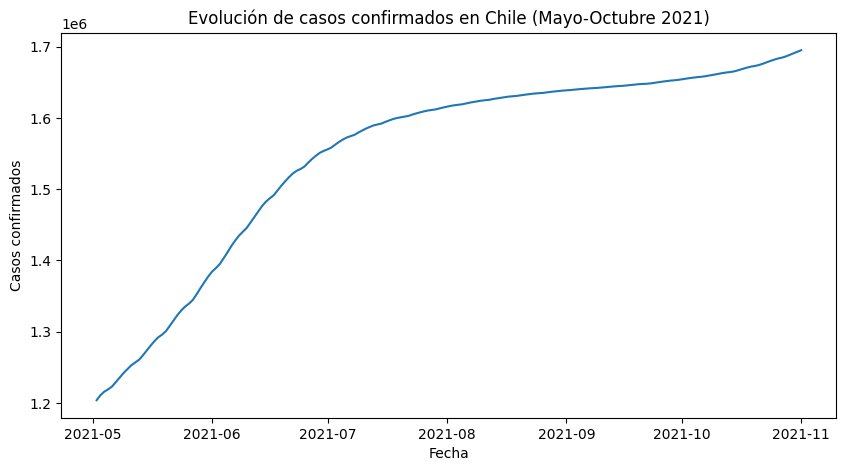

In [21]:
chile = DFMayo_Octubre2021[DFMayo_Octubre2021["country_region"] == "Chile"]
chile_evol = (chile.groupby("last_update")["confirmed"].sum().reset_index())
#chile_evol

plt.figure(figsize=(10,5))
sns.lineplot(data=chile_evol,
             x="last_update",
             y="confirmed")
plt.title("Evolución de casos confirmados en Chile (Mayo-Octubre 2021)")
plt.xlabel("Fecha")
plt.ylabel("Casos confirmados")
plt.show()

6. ¿Cuál fue la fecha con más nuevos casos a nivel mundial durante este período?

In [22]:
new_cases = (DFMayo_Octubre2021.groupby("last_update")["confirmed"].sum().diff().reset_index(name="new_cases"))

max_day = new_cases.loc[new_cases["new_cases"].idxmax()]
print("Fecha con más nuevos casos:", max_day["last_update"], "con", int(max_day["new_cases"]), "casos nuevos.")

Fecha con más nuevos casos: 2021-05-02 con 152689067 casos nuevos.


7. ¿Existe correlación entre casos confirmados y fallecidos? (gráfico de dispersión +
regresión).

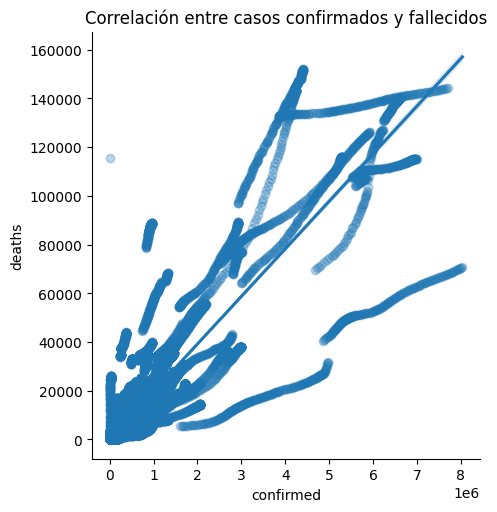

Coeficiente de correlación: 0.89


In [23]:
sns.lmplot(data=DFMayo_Octubre2021,
           x="confirmed",
           y="deaths",
           scatter_kws={'alpha':0.3})
plt.title("Correlación entre casos confirmados y fallecidos")
plt.show()

corr = DFMayo_Octubre2021["confirmed"].corr(DFMayo_Octubre2021["deaths"])
print(f"Coeficiente de correlación: {corr:.2f}")

8. Mostrar el Top 10 de países con mayor crecimiento porcentual de casos entre mayo y
junio.

In [24]:
mayo = DFMayo_Octubre2021[DFMayo_Octubre2021["source_file"].str.startswith("05")]
julio = DFMayo_Octubre2021[DFMayo_Octubre2021["source_file"].str.startswith("06")]

crecimiento = (julio.groupby("country_region")["confirmed"].sum() - mayo.groupby("country_region")["confirmed"].sum()).sort_values(ascending=False)
crecimiento.head(10)

#sns.barplot(x=crecimiento.values,
#            y=crecimiento.index,
#            palette="Oranges_r")
#plt.title("Crecimiento de casos confirmados (mayo → junio 2021)")
#plt.xlabel("Incremento de casos")
#plt.ylabel("País")
#plt.show()

,confirmed
country_region,
India,125972300
Brazil,43722435
Argentina,21234773
Colombia,17996654
Iran,6747912
Malaysia,5240664
Indonesia,4706428
Russia,4642424
Chile,4583194


9. Identificar países con rebrote (un día sin casos y luego un incremento posterior).

In [25]:
DFMayo_Octubre2021["daily_new"] = DFMayo_Octubre2021.groupby("country_region")["confirmed"].diff()
rebrote = DFMayo_Octubre2021.groupby("country_region")["daily_new"].apply(lambda x: (x < 0).any() and (x > 0).any())
print("Países con posible rebrote:\n", rebrote[rebrote].index.tolist())

Países con posible rebrote:
 ['Antigua and Barbuda', 'Australia', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Czechia', 'Denmark', 'France', 'Germany', 'India', 'Ireland', 'Italy', 'Japan', 'Kazakhstan', 'Liberia', 'Malaysia', 'Mexico', 'Mozambique', 'Netherlands', 'New Zealand', 'Pakistan', 'Peru', 'Russia', 'Spain', 'Sudan', 'Sweden', 'Ukraine', 'United Kingdom', 'United States']


10. Generar un reporte de perfilado automático (ydata-profiling o pandas_profiling) que incluya
distribuciones, correlaciones y resumen de calidad de datos.

In [26]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [27]:
profile = ProfileReport(DFMayo_Octubre2021, title="Perfilado COVID-19 entre Mayo-Octubre 2021", explorative=True)
profile.to_file("perfilado.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:24<00:00,  1.63s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]